<center>

# **22AIE401 - Reinforcement Learning**  
# **Lab 6**  

</center>

### Team Members:
- Guruprasath M R - AIE22015  
- Rudraksh Mohanty - AIE22046  
- Shree Prasad M - AIE22050  
- Tharun Kaarthik G K - AIE22062  

---

### Objective:
To apply n-step Temporal Difference Learning in a robot rescue mission, where a robot navigates a mazelike grid environment. 
---

### Problem Statement:
Design and train a reinforcement learning agent using n-step bootstrapping to simulate a rescue robot
navigating a grid environment. The robot should learn an optimal policy to:
Reach survivors efficiently,Avoid traps, and Minimize movement cost in a dynamic, partially hostile
environment. 
---


## Original Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
from collections import deque
import random
import matplotlib.animation as animation 
import warnings
warnings.filterwarnings("ignore")

✅ Training complete.


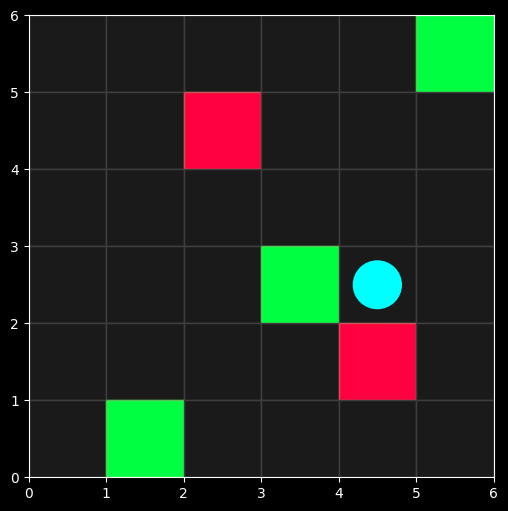

In [2]:
# ====== Parameters ======
GRID_SIZE = 6
ACTIONS = ['U', 'D', 'L', 'R']
ACTION_MAP = {'U': (-1, 0), 'D': (1, 0), 'L': (0, -1), 'R': (0, 1)}
n_steps = 3
gamma = 0.9
alpha = 0.1
epsilon = 0.2
episodes = 3000
max_steps = 50
SURVIVORS = [(0, 5), (3, 3), (5, 1)]
TRAPS = [(1, 2), (4, 4)]
GOAL_REWARD = 10
TRAP_PENALTY = -10
STEP_COST = -1
Q = {}

# ====== Environment Functions ======
def init_state():
    while True:
        s = (random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1))
        if s not in SURVIVORS and s not in TRAPS:
            return s

def get_valid_actions(pos):
    valid = []
    for a, (dx, dy) in ACTION_MAP.items():
        nx, ny = pos[0] + dx, pos[1] + dy
        if 0 <= nx < GRID_SIZE and 0 <= ny < GRID_SIZE:
            valid.append(a)
    return valid

def select_action(state):
    valid_actions = get_valid_actions(state)
    if not valid_actions:
        return random.choice(ACTIONS)
    if state not in Q:
        Q[state] = {a: 0 for a in valid_actions}
    else:
        Q[state] = {a: Q[state].get(a, 0) for a in valid_actions}
    if np.random.rand() < epsilon:
        return random.choice(valid_actions)
    return max(Q[state], key=Q[state].get)

def step(state, action):
    dx, dy = ACTION_MAP[action]
    next_state = (state[0] + dx, state[1] + dy)
    reward = STEP_COST
    if next_state in SURVIVORS:
        reward += GOAL_REWARD
    elif next_state in TRAPS:
        reward += TRAP_PENALTY
    return next_state, reward

# ====== Training Phase ======
from collections import deque

for ep in range(episodes):
    state = init_state()
    if state not in Q:
        Q[state] = {a: 0 for a in get_valid_actions(state)}
    trajectory = deque()
    for step_i in range(max_steps):
        action = select_action(state)
        next_state, reward = step(state, action)
        trajectory.append((state, action, reward))
        if len(trajectory) >= n_steps:
            G = sum([trajectory[i][2] * (gamma ** i) for i in range(n_steps)])
            s0, a0, _ = trajectory.popleft()
            if next_state not in Q:
                Q[next_state] = {a: 0 for a in get_valid_actions(next_state)}
            G += (gamma ** n_steps) * max(Q[next_state].values())
            Q[s0][a0] += alpha * (G - Q[s0][a0])
        state = next_state
    while trajectory:
        G = sum([trajectory[i][2] * (gamma ** i) for i in range(len(trajectory))])
        s0, a0, _ = trajectory.popleft()
        Q.setdefault(s0, {a: 0 for a in get_valid_actions(s0)})
        Q[s0][a0] += alpha * (G - Q[s0][a0])
print("✅ Training complete.")

# ====== Simulation Step Sequence for Visualization ======
state = init_state()
steps = [state]
for _ in range(20):
    action = select_action(state)
    state, _ = step(state, action)
    steps.append(state)

# ====== Animation Code ======
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(6, 6), facecolor='black')
robot_patch = patches.Circle((0.5, 0.5), 0.3, color='#00FFFF', edgecolor='#FFFFFF', linewidth=2)

def init():
    ax.clear()
    ax.set_facecolor('#0A0A0A')
    ax.set_xlim(0, GRID_SIZE)
    ax.set_ylim(0, GRID_SIZE)
    ax.set_xticks(np.arange(GRID_SIZE + 1))
    ax.set_yticks(np.arange(GRID_SIZE + 1))
    ax.grid(True, color='#333333', alpha=0.3)
    ax.tick_params(colors='#FFFFFF')
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            cell = (i, j)
            color = '#1A1A1A'
            edgecolor = '#444444'
            if cell in TRAPS:
                color = '#FF0040'
                edgecolor = '#FF6666'
            elif cell in SURVIVORS:
                color = '#00FF40'
                edgecolor = '#66FF66'
            rect = patches.Rectangle((j, GRID_SIZE - i - 1), 1, 1, 
                                   facecolor=color, edgecolor=edgecolor, linewidth=1)
            ax.add_patch(rect)
    return []

def update(frame):
    init()
    rx, ry = steps[frame]
    robot_patch.center = (ry + 0.5, GRID_SIZE - rx - 0.5)
    ax.add_patch(robot_patch)
    return [robot_patch]

anim = FuncAnimation(fig, update, frames=len(steps), init_func=init, blit=True)
# Save video (optional)
#anim.save("rescue_robot_animation.mp4", writer="ffmpeg", fps=2)
# To view inline in notebooks:
from IPython.display import HTML
HTML(anim.to_jshtml())

## Task 1

Deploy 2 or more rescue robots simultaneously.
Ensure they avoid redundant paths, collisions, and rescue conflicts.Add multiple robots and
simulate coordination. 

✅ Multi-robot training complete.


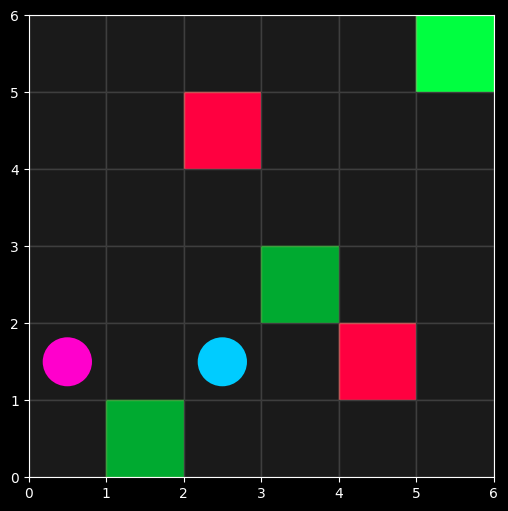

In [3]:
# ====== Task 1: Multi-Robot Coordination ======

# ====== Parameters ======
GRID_SIZE = 6
ACTIONS = ['U', 'D', 'L', 'R', 'S']  # 'S' for Stay
ACTION_MAP = {'U': (-1, 0), 'D': (1, 0), 'L': (0, -1), 'R': (0, 1), 'S': (0, 0)}
NUM_ROBOTS = 2
n_steps = 3
gamma = 0.9
alpha = 0.1
epsilon = 0.2
episodes = 5000
max_steps = 100

# Using a copy to modify them during simulation
SURVIVORS = [(0, 5), (3, 3), (5, 1)]
TRAPS = [(1, 2), (4, 4)]

GOAL_REWARD = 100  # Increased reward for finding a survivor
TRAP_PENALTY = -50
STEP_COST = -1
COLLISION_PENALTY = -10 # Penalty for robots colliding

# Shared Q-table for all robots
Q_multi = {}

# ====== Environment Functions for Multi-Robot ======
def init_multi_robot_state():
    """Initializes positions for multiple robots, ensuring they are not on obstacles or each other."""
    positions = []
    while len(positions) < NUM_ROBOTS:
        pos = (random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1))
        if pos not in SURVIVORS and pos not in TRAPS and pos not in positions:
            positions.append(pos)
    return tuple(positions)

def get_valid_actions_multi(pos):
    """Gets valid actions for a single robot."""
    valid = []
    for a, (dx, dy) in ACTION_MAP.items():
        nx, ny = pos[0] + dx, pos[1] + dy
        if 0 <= nx < GRID_SIZE and 0 <= ny < GRID_SIZE:
            valid.append(a)
    return valid

def select_action_multi(robot_id, state):
    """Selects an action for a specific robot, using the shared Q-table."""
    robot_pos = state[robot_id]
    valid_actions = get_valid_actions_multi(robot_pos)
    
    # Ensure state-action pairs are in the Q-table
    if robot_pos not in Q_multi:
        Q_multi[robot_pos] = {a: 0 for a in valid_actions}
    
    if random.random() < epsilon:
        return random.choice(valid_actions)
    else:
        # Find the best action from the Q-table
        q_values = Q_multi[robot_pos]
        return max(q_values, key=q_values.get)

def step_multi(state, actions, rescued_survivors):
    """
    Executes a step for all robots, calculates rewards, and handles interactions.
    """
    next_positions = list(state)
    rewards = [STEP_COST] * NUM_ROBOTS
    
    # Move robots
    for i in range(NUM_ROBOTS):
        dx, dy = ACTION_MAP[actions[i]]
        next_positions[i] = (state[i][0] + dx, state[i][1] + dy)

    # Check for collisions
    if len(set(next_positions)) < NUM_ROBOTS:
        for i in range(NUM_ROBOTS):
            rewards[i] += COLLISION_PENALTY
        # Robots stay in their previous positions if a collision would occur
        next_state = state
    else:
        next_state = tuple(next_positions)

    # Check for rewards and penalties
    for i in range(NUM_ROBOTS):
        if next_state[i] in SURVIVORS and next_state[i] not in rescued_survivors:
            rewards[i] += GOAL_REWARD
            rescued_survivors.add(next_state[i])
        elif next_state[i] in TRAPS:
            rewards[i] += TRAP_PENALTY
            
    return next_state, rewards, rescued_survivors

# ====== Training Phase for Multi-Robot ======
rescued_survivors_globally = set()

for ep in range(episodes):
    state = init_multi_robot_state()
    rescued_survivors_episode = set()
    
    for step_i in range(max_steps):
        # All robots select an action
        actions = [select_action_multi(i, state) for i in range(NUM_ROBOTS)]
        
        # Environment steps forward
        next_state, rewards, rescued_survivors_episode = step_multi(state, actions, rescued_survivors_episode)
        
        # Update Q-values for each robot
        for i in range(NUM_ROBOTS):
            s, a, r = state[i], actions[i], rewards[i]
            s_next = next_state[i]
            
            if s not in Q_multi:
                Q_multi[s] = {act: 0 for act in get_valid_actions_multi(s)}
            if s_next not in Q_multi:
                Q_multi[s_next] = {act: 0 for act in get_valid_actions_multi(s_next)}

            # Standard Q-learning update
            best_next_action_val = max(Q_multi[s_next].values()) if Q_multi[s_next] else 0
            Q_multi[s][a] += alpha * (r + gamma * best_next_action_val - Q_multi[s][a])
        
        state = next_state
        if len(rescued_survivors_episode) == len(SURVIVORS):
            break

print("✅ Multi-robot training complete.")

# ====== Simulation for Visualization ======
state = init_multi_robot_state()
steps_multi = [state]
rescued_survivors_sim = set()

for _ in range(50):
    actions = [select_action_multi(i, state) for i in range(NUM_ROBOTS)]
    state, _, rescued_survivors_sim = step_multi(state, actions, rescued_survivors_sim)
    steps_multi.append(state)

# ====== Animation Code for Multi-Robot ======
fig_multi, ax_multi = plt.subplots(figsize=(6, 6), facecolor='black')
robot_patches = [
    patches.Circle((0, 0), 0.3, color='#00CCFF', edgecolor='#FFFFFF', linewidth=2),
    patches.Circle((0, 0), 0.3, color='#FF00CC', edgecolor='#FFFFFF', linewidth=2)
]

def init_multi():
    ax_multi.clear()
    ax_multi.set_facecolor('#0A0A0A')
    ax_multi.set_xlim(0, GRID_SIZE)
    ax_multi.set_ylim(0, GRID_SIZE)
    ax_multi.set_xticks(np.arange(GRID_SIZE + 1))
    ax_multi.set_yticks(np.arange(GRID_SIZE + 1))
    ax_multi.grid(True, color='#333333', alpha=0.3)
    ax_multi.tick_params(colors='#FFFFFF')
    
    current_rescued = set()
    if len(steps_multi) > 0:
        last_state = steps_multi[-1]
        for pos in last_state:
            if pos in SURVIVORS:
                current_rescued.add(pos)

    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            cell = (i, j)
            color = '#1A1A1A'
            edgecolor = '#444444'
            if cell in TRAPS:
                color = '#FF0040'
                edgecolor = '#FF6666'
            elif cell in SURVIVORS and cell not in rescued_survivors_sim:
                color = '#00FF40'
                edgecolor = '#66FF66'
            elif cell in SURVIVORS and cell in rescued_survivors_sim:
                color = '#00AA30'  # Darker green for rescued survivor
                edgecolor = '#44CC44'
            rect = patches.Rectangle((j, GRID_SIZE - i - 1), 1, 1, 
                                   facecolor=color, edgecolor=edgecolor, linewidth=1)
            ax_multi.add_patch(rect)
    return []

def update_multi(frame):
    init_multi()
    state = steps_multi[frame]
    for i in range(NUM_ROBOTS):
        rx, ry = state[i]
        robot_patches[i].center = (ry + 0.5, GRID_SIZE - rx - 0.5)
        ax_multi.add_patch(robot_patches[i])
    return robot_patches

anim_multi = FuncAnimation(fig_multi, update_multi, frames=len(steps_multi), init_func=init_multi, blit=True)
HTML(anim_multi.to_jshtml())

### Task 1: Multi-Robot Coordination
**Updates Includes:**
- **Multiple Agents**: Extended from single robot to 2 robots operating simultaneously
- **New Action**: Added 'S' (Stay) action to the action space for collision avoidance
- **Shared Q-table**: Both robots learn from a single shared Q-table (`Q_multi`) enabling collective learning
- **State Representation**: State now represents positions of all robots as a tuple: `((r1_x, r1_y), (r2_x, r2_y))`
- **Collision Detection**: Added collision penalty and logic to prevent robots from occupying the same cell
- **Coordination**: Robots track rescued survivors to avoid redundant rescues
- **Enhanced Rewards**: Increased goal reward to 100 and trap penalty to -50 for better learning signals

## Task 2

Apply TD(λ) with eligibility traces to improve learning.
Rewards must propagate backward across visited states Use eligibility traces to propagate
rewards backward to visited states.

✅ TD(λ) training complete.


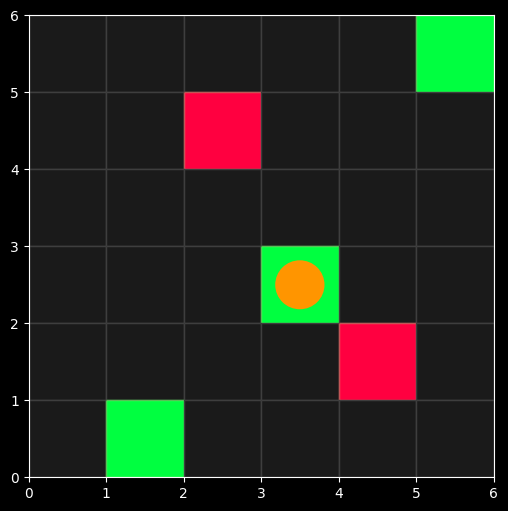

In [4]:
# ====== Task 2: TD(λ) with Eligibility Traces ======

# ====== Parameters ======
lambda_ = 0.9  # Eligibility trace decay rate
Q_lambda = {}
E = {}  # Eligibility traces

# ====== Training Phase with TD(λ) ======
for ep in range(episodes):
    state = init_state()
    E = {}  # Reset eligibility traces for each new episode

    for step_i in range(max_steps):
        # Ensure the state is in the Q-table
        if state not in Q_lambda:
            Q_lambda[state] = {a: 0 for a in get_valid_actions(state)}
        
        action = select_action(state)
        next_state, reward = step(state, action)

        # Ensure the next_state is in the Q-table
        if next_state not in Q_lambda:
            Q_lambda[next_state] = {a: 0 for a in get_valid_actions(next_state)}

        # Calculate TD error (delta)
        td_target = reward + gamma * max(Q_lambda[next_state].values())
        td_error = td_target - Q_lambda[state][action]

        # Increment eligibility trace for the current state-action pair
        if state not in E:
            E[state] = {a: 0 for a in get_valid_actions(state)}
        E[state][action] += 1

        # Update Q-values and decay eligibility traces
        for s_e in E:
            for a_e in E[s_e]:
                Q_lambda[s_e][a_e] += alpha * td_error * E[s_e][a_e]
                E[s_e][a_e] *= gamma * lambda_
        
        state = next_state
        if reward == GOAL_REWARD or reward == TRAP_PENALTY:
            break

print("✅ TD(λ) training complete.")

# ====== Simulation for Visualization ======
state = init_state()
steps_lambda = [state]
for _ in range(50):
    if state not in Q_lambda:
        Q_lambda[state] = {a: 0 for a in get_valid_actions(state)}
    action = max(Q_lambda[state], key=Q_lambda[state].get)
    state, _ = step(state, action)
    steps_lambda.append(state)

# ====== Animation Code for TD(λ) ======
fig_lambda, ax_lambda = plt.subplots(figsize=(6, 6), facecolor='black')
robot_patch_lambda = patches.Circle((0, 0), 0.3, color='#FF9500', edgecolor='#FFCC00', linewidth=2)

def init_lambda():
    ax_lambda.clear()
    ax_lambda.set_facecolor('#0A0A0A')
    ax_lambda.set_xlim(0, GRID_SIZE)
    ax_lambda.set_ylim(0, GRID_SIZE)
    ax_lambda.set_xticks(np.arange(GRID_SIZE + 1))
    ax_lambda.set_yticks(np.arange(GRID_SIZE + 1))
    ax_lambda.grid(True, color='#333333', alpha=0.3)
    ax_lambda.tick_params(colors='#FFFFFF')
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            cell = (i, j)
            color = '#1A1A1A'
            edgecolor = '#444444'
            if cell in TRAPS:
                color = '#FF0040'
                edgecolor = '#FF6666'
            elif cell in SURVIVORS:
                color = '#00FF40'
                edgecolor = '#66FF66'
            rect = patches.Rectangle((j, GRID_SIZE - i - 1), 1, 1, 
                                   facecolor=color, edgecolor=edgecolor, linewidth=1)
            ax_lambda.add_patch(rect)
    return []

def update_lambda(frame):
    init_lambda()
    rx, ry = steps_lambda[frame]
    robot_patch_lambda.center = (ry + 0.5, GRID_SIZE - rx - 0.5)
    ax_lambda.add_patch(robot_patch_lambda)
    return [robot_patch_lambda]

anim_lambda = FuncAnimation(fig_lambda, update_lambda, frames=len(steps_lambda), init_func=init_lambda, blit=True)
HTML(anim_lambda.to_jshtml())

### Task 2: TD(λ) with Eligibility Traces
**Updates Includes:**
- **Eligibility Traces**: Added eligibility trace table `E` to track state-action visit recency
- **Lambda Parameter**: Introduced `lambda_` (0.9) for trace decay rate
- **Backward Propagation**: TD errors now propagate backward to all previously visited state-action pairs
- **Trace Updates**: Eligibility traces increment for current state-action and decay for all others
- **Faster Learning**: Rewards propagate more efficiently through the trajectory, potentially speeding up convergence


## Task 3

Introduce moving traps, such as: Fire, debris, or gas clouds that change positions every few
steps. 

✅ Training with moving traps complete.


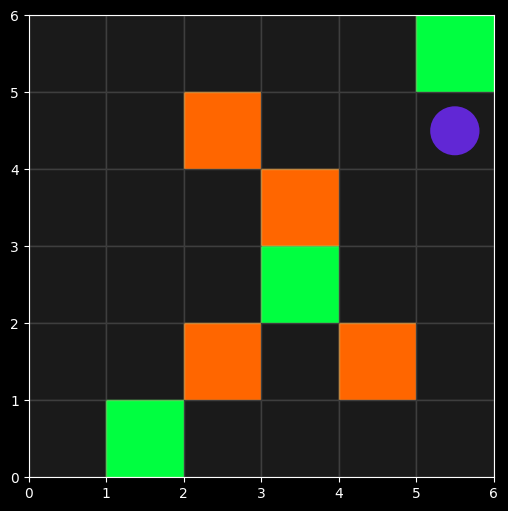

In [5]:
# ====== Task 3: Moving Traps ======

# ====== Parameters ======
Q_moving_traps = {}
moving_traps = [(2, 2), (3, 4)]  # Initial positions of moving traps
trap_move_interval = 5  # Traps move every 5 steps

# ====== Environment Functions for Moving Traps ======
def update_moving_traps(traps):
    """Moves traps to a random adjacent cell."""
    new_traps = []
    for trap in traps:
        # Simple random walk
        move = random.choice(list(ACTION_MAP.values()))
        nx, ny = trap[0] + move[0], trap[1] + move[1]
        if 0 <= nx < GRID_SIZE and 0 <= ny < GRID_SIZE:
            new_traps.append((nx, ny))
        else:
            new_traps.append(trap)  # Stay if move is out of bounds
    return new_traps

def step_with_moving_traps(state, action, current_traps):
    """Step function that considers moving traps."""
    dx, dy = ACTION_MAP[action]
    next_state = (state[0] + dx, state[1] + dy)
    reward = STEP_COST
    if next_state in SURVIVORS:
        reward += GOAL_REWARD
    elif next_state in current_traps:
        reward += TRAP_PENALTY
    return next_state, reward

# ====== Training with Moving Traps ======
for ep in range(episodes):
    state = init_state()
    current_traps = list(TRAPS) + moving_traps
    
    for step_i in range(max_steps):
        if step_i > 0 and step_i % trap_move_interval == 0:
            moving_traps = update_moving_traps(moving_traps)
            current_traps = list(TRAPS) + moving_traps

        if state not in Q_moving_traps:
            Q_moving_traps[state] = {a: 0 for a in get_valid_actions(state)}

        action = max(Q_moving_traps[state], key=Q_moving_traps[state].get) if random.random() > epsilon else random.choice(get_valid_actions(state))
        next_state, reward = step_with_moving_traps(state, action, current_traps)

        if next_state not in Q_moving_traps:
            Q_moving_traps[next_state] = {a: 0 for a in get_valid_actions(next_state)}

        # Q-learning update
        best_next_action_val = max(Q_moving_traps[next_state].values())
        Q_moving_traps[state][action] += alpha * (reward + gamma * best_next_action_val - Q_moving_traps[state][action])
        
        state = next_state
        if reward > 0 or reward < -1: # Survivor found or trap hit
            break

print("✅ Training with moving traps complete.")

# ====== Simulation for Visualization ======
state = init_state()
steps_moving_traps = [(state, list(TRAPS) + moving_traps)]
current_traps_sim = list(TRAPS) + moving_traps

for step_i in range(50):
    if step_i > 0 and step_i % trap_move_interval == 0:
        moving_traps = update_moving_traps(moving_traps)
        current_traps_sim = list(TRAPS) + moving_traps
    
    action = max(Q_moving_traps[state], key=Q_moving_traps[state].get)
    state, _ = step_with_moving_traps(state, action, current_traps_sim)
    steps_moving_traps.append((state, current_traps_sim))

# ====== Animation Code for Moving Traps ======
fig_moving, ax_moving = plt.subplots(figsize=(6, 6), facecolor='black')
robot_patch_moving = patches.Circle((0, 0), 0.3, color="#6127D5", edgecolor='#AAFFAA', linewidth=2)

def init_moving():
    ax_moving.clear()
    ax_moving.set_facecolor('#0A0A0A')
    ax_moving.set_xlim(0, GRID_SIZE)
    ax_moving.set_ylim(0, GRID_SIZE)
    ax_moving.set_xticks(np.arange(GRID_SIZE + 1))
    ax_moving.set_yticks(np.arange(GRID_SIZE + 1))
    ax_moving.grid(True, color='#333333', alpha=0.3)
    ax_moving.tick_params(colors='#FFFFFF')
    return []

def update_moving(frame):
    init_moving()
    state, current_traps = steps_moving_traps[frame]
    
    # Draw grid
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            cell = (i, j)
            color = '#1A1A1A'
            edgecolor = '#444444'
            if cell in current_traps:
                color = '#FF6600'  # Bright orange for moving traps
                edgecolor = '#FFAA44'
            elif cell in SURVIVORS:
                color = '#00FF40'
                edgecolor = '#66FF66'
            rect = patches.Rectangle((j, GRID_SIZE - i - 1), 1, 1, 
                                   facecolor=color, edgecolor=edgecolor, linewidth=1)
            ax_moving.add_patch(rect)
            
    # Draw robot
    rx, ry = state
    robot_patch_moving.center = (ry + 0.5, GRID_SIZE - rx - 0.5)
    ax_moving.add_patch(robot_patch_moving)
    
    return [robot_patch_moving]

anim_moving = FuncAnimation(fig_moving, update_moving, frames=len(steps_moving_traps), init_func=init_moving, blit=True)
HTML(anim_moving.to_jshtml())

### Task 3: Moving Traps
**Updates Include:**
- **Dynamic Environment**: Introduced moving traps that change positions every 5 steps
- **Non-Stationary Learning**: Agent must adapt to constantly changing trap locations
- **Random Walk Traps**: Traps move using random walk within grid boundaries
- **Updated Step Function**: `step_with_moving_traps()` considers current trap positions
- **Temporal Dynamics**: Training loop updates trap positions at regular intervals during episodes

## Task 4

Robots should: Avoid hazards in real-time and learn to predict high-risk zones over time

✅ Training with hazard avoidance complete.


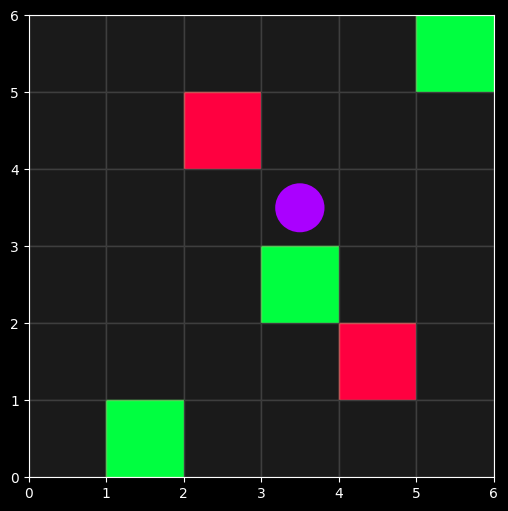

In [6]:
# ====== Task 4: Hazard Avoidance and Risk Prediction ======

# ====== Parameters ======
Q_hazard = {}
hazard_map = np.zeros((GRID_SIZE, GRID_SIZE))  # To predict high-risk zones
hazard_penalty = -5  # Additional penalty for predicted high-risk zones
risk_threshold = 2  # Threshold to consider a zone as high-risk

# ====== Environment Functions for Hazard Avoidance ======
def update_hazard_map(state):
    """Increments the hazard count for a visited state."""
    hazard_map[state] += 1

def select_action_hazard_aware(state):
    """Selects an action, considering the hazard map for risk prediction."""
    valid_actions = get_valid_actions(state)
    if not valid_actions:
        return random.choice(ACTIONS)
    
    if state not in Q_hazard:
        Q_hazard[state] = {a: 0 for a in valid_actions}
    
    # Create a copy of Q-values to modify based on risk prediction
    risk_adjusted_q = Q_hazard[state].copy()
    
    # Penalize actions that lead to high-risk zones
    for action in valid_actions:
        dx, dy = ACTION_MAP[action]
        next_state = (state[0] + dx, state[1] + dy)
        if 0 <= next_state[0] < GRID_SIZE and 0 <= next_state[1] < GRID_SIZE:
            if hazard_map[next_state] >= risk_threshold:
                risk_adjusted_q[action] += hazard_penalty

    if random.random() < epsilon:
        return random.choice(valid_actions)
    else:
        return max(risk_adjusted_q, key=risk_adjusted_q.get)

# ====== Training with Hazard Avoidance ======
for ep in range(episodes):
    state = init_state()
    
    for step_i in range(max_steps):
        action = select_action_hazard_aware(state)
        next_state, reward = step(state, action)
        
        # Update hazard map when hitting a trap
        if next_state in TRAPS:
            update_hazard_map(next_state)

        if state not in Q_hazard:
            Q_hazard[state] = {a: 0 for a in get_valid_actions(state)}
        if next_state not in Q_hazard:
            Q_hazard[next_state] = {a: 0 for a in get_valid_actions(next_state)}

        # Standard Q-learning update
        best_next_action_val = max(Q_hazard[next_state].values()) if Q_hazard[next_state] else 0
        Q_hazard[state][action] += alpha * (reward + gamma * best_next_action_val - Q_hazard[state][action])
        
        state = next_state
        if reward > 0 or reward < -1:  # Survivor found or trap hit
            break

print("✅ Training with hazard avoidance complete.")

# ====== Simulation for Visualization ======
state = init_state()
steps_hazard = [state]
for _ in range(50):
    action = select_action_hazard_aware(state)
    state, _ = step(state, action)
    steps_hazard.append(state)

# ====== Animation Code for Hazard Avoidance ======
fig_hazard, ax_hazard = plt.subplots(figsize=(6, 6), facecolor='black')
robot_patch_hazard = patches.Circle((0, 0), 0.3, color='#AA00FF', edgecolor='#DDAAFF', linewidth=2)

def init_hazard():
    ax_hazard.clear()
    ax_hazard.set_facecolor('#0A0A0A')
    ax_hazard.set_xlim(0, GRID_SIZE)
    ax_hazard.set_ylim(0, GRID_SIZE)
    ax_hazard.set_xticks(np.arange(GRID_SIZE + 1))
    ax_hazard.set_yticks(np.arange(GRID_SIZE + 1))
    ax_hazard.grid(True, color='#333333', alpha=0.3)
    ax_hazard.tick_params(colors='#FFFFFF')
    
    # Visualize the hazard map with risk zones
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            cell = (i, j)
            color = '#1A1A1A'
            edgecolor = '#444444'
            if cell in TRAPS:
                color = '#FF0040'
                edgecolor = '#FF6666'
            elif cell in SURVIVORS:
                color = '#00FF40'
                edgecolor = '#66FF66'
            elif hazard_map[cell] >= risk_threshold:
                color = '#FFFF00'  # Bright yellow for predicted high-risk zones
                edgecolor = '#FFFF88'
            rect = patches.Rectangle((j, GRID_SIZE - i - 1), 1, 1, 
                                   facecolor=color, edgecolor=edgecolor, linewidth=1)
            ax_hazard.add_patch(rect)
    return []

def update_hazard(frame):
    init_hazard()
    rx, ry = steps_hazard[frame]
    robot_patch_hazard.center = (ry + 0.5, GRID_SIZE - rx - 0.5)
    ax_hazard.add_patch(robot_patch_hazard)
    return [robot_patch_hazard]

anim_hazard = FuncAnimation(fig_hazard, update_hazard, frames=len(steps_hazard), init_func=init_hazard, blit=True)
HTML(anim_hazard.to_jshtml())


### Task 4: Hazard Avoidance and Risk Prediction
**Updates Include:**
- **Hazard Map**: Added `hazard_map` to track and predict high-risk zones
- **Risk Learning**: Robot learns from experience which areas are dangerous
- **Predictive Avoidance**: Action selection considers predicted risk levels
- **Risk Threshold**: Zones with hazard count ≥ 2 are considered high-risk
- **Dynamic Penalties**: Q-values are adjusted in real-time based on learned risk patterns
- **Visualization**: Yellow cells in animation show predicted high-risk zones